This is a clustering analysis that uses hierarchical clustering and k-means clustering to analyze student data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student = pd.read_csv("data/student.csv", index_col=0)

Standardizing our data

In [4]:
means = np.reshape(np.array(np.mean(student)), (1,3))
sd = np.reshape(np.array(np.std(student)), (1,3))
standard = (student - means) / sd

Now, we start the hierarchical clustering analysis.

In [6]:
from scipy.cluster.hierarchy import linkage
hc_average = linkage(standard, method='complete', metric='euclidean')

We are using hierarchical clustering with average linkage and measuring euclidean distance. Now we can make a dendrogram to visualize our analysis.

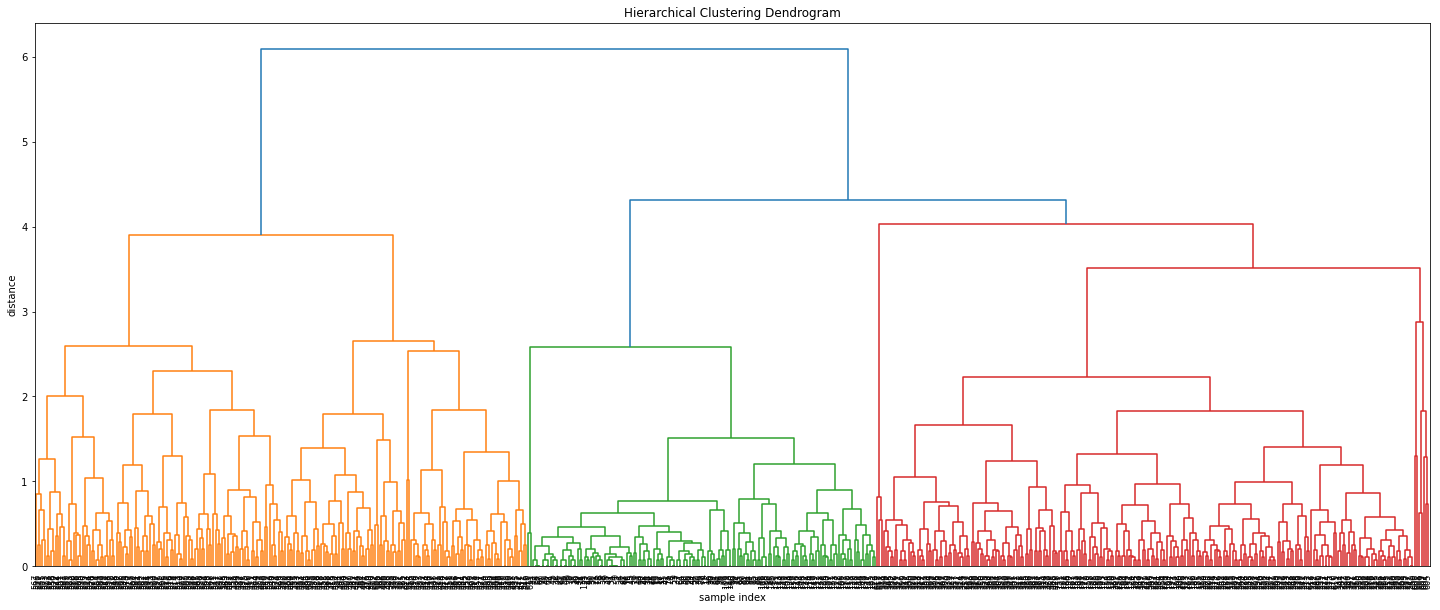

In [7]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

Lets cluster this data so that each observation belongs to one of three groups.

In [8]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_average, n_clusters=3).T)
cut = cut_tree(hc_average, n_clusters=3)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
  1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 2 2 1
  2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
  2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 

These are the groups according to our hierarchical clustering.
Now, we move on to the k-means clustering, which we can then compare.

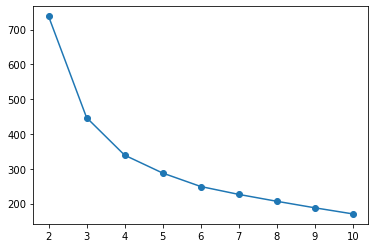

In [9]:
from sklearn.cluster import KMeans
clusters_range=[2,3,4,5,6,7,8,9,10]
inertia = []
for c in clusters_range:
    kmeans = KMeans(init='k-means++', n_clusters=c, n_init=20,
                    random_state=0).fit(standard)
    inertia.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertia, marker='o')
plt.show()

We are using the "elbow method" here. A quick way to find a good number k, for our k-means clustering. Our "elbow" in the plot seems to be around 3 or 4. Now we make the model using k=3.

In [10]:
cluster_3 = KMeans(n_clusters=3,random_state=42).fit(standard)
print(cluster_3.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2
 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

We can move on to the comparison.

In [11]:
from mpl_toolkits import mplot3d

colors1 = cluster_3.labels_+1
colors2 = cut+1

The groups were labeled opposite of each other (group 2 for the first model is group 0 of the second model) for each model, so I wrote some code to swap the labels around

In [12]:
cut2 = np.empty((620,1))
for i in range(np.shape(cut)[0]):
    if cut[i,0] == 1:
        cut2[i,0] = 2
        continue
    if cut[i,0] == 2:
        cut2[i,0] = 1
        continue
    else:
        cut2[i,0] = 0

colors3 = cut2+1

The chunk below prints "0" if the two models grouped a sample the same way and a "1" if they were grouped differently.

In [13]:
diff = []
for i in range(np.shape(standard)[0]):
    if cut2[i,0] == cluster_3.labels_[i]:
        diff.append(0)
    if cut2[i,0] != cluster_3.labels_[i]:
        diff.append(1)
print(diff)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Now we can plot the different clustering methods, to visualize the difference.

First the 3 cluster hierarchical.

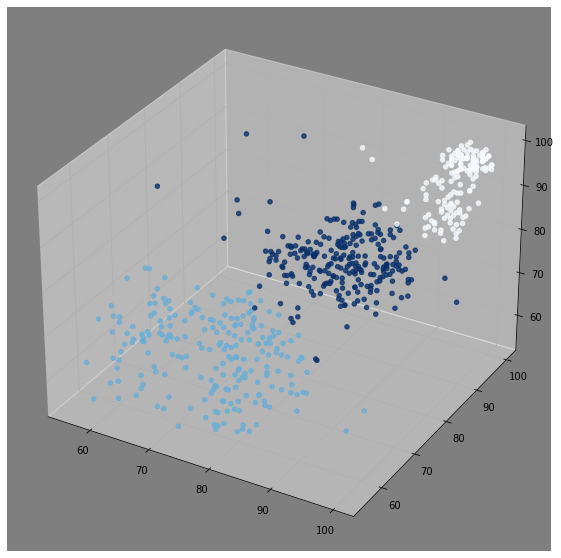

In [14]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_facecolor('tab:grey')
ax.scatter3D(student.iloc[:,0], student.iloc[:,1], student.iloc[:,2],
             c=colors1, cmap='Blues',alpha=0.8)

Now the 3-means clustering

<ipython-input-15-40f33dbb993c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


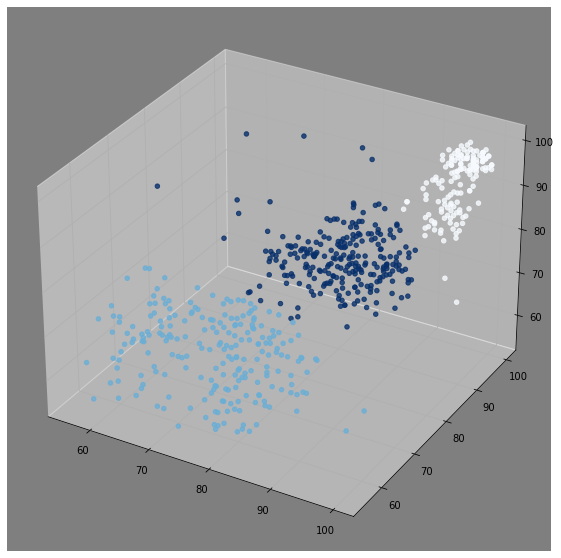

In [15]:
plt.figure(figsize=(10,10))
plt.title(label='3 Cluster Hierchical')
ax = plt.axes(projection='3d')
ax.set_facecolor('tab:grey')
ax.scatter3D(student.iloc[:,0], student.iloc[:,1], student.iloc[:,2],
              c=colors3, cmap='Blues',alpha=0.8)

Now we can plot it, and highlight the ones that differ between the two methods.

<ipython-input-16-5e156b2c9196>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection='3d')


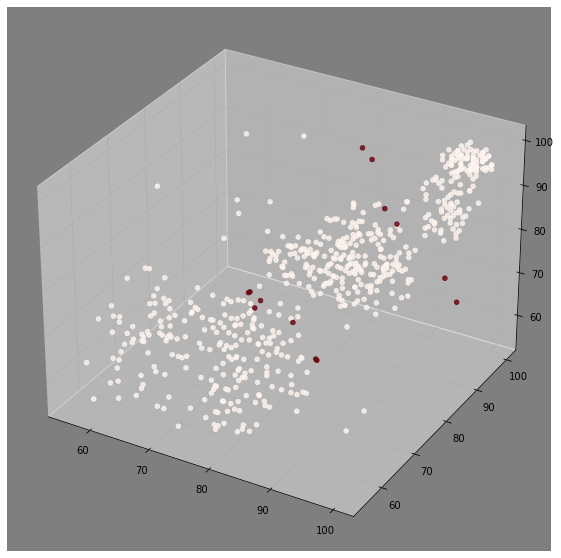

In [16]:
plt.figure(figsize=(10,10))
plt.title(label='Differences in the two methods')
ax = plt.axes(projection='3d')
ax.set_facecolor('tab:grey')
ax.scatter3D(student.iloc[:,0], student.iloc[:,1], student.iloc[:,2],
              c=diff, cmap='Reds',alpha=0.8)

As could probably be predicted, the samples that are differing are the ones that are on the edges of their respective groups, but overall there are relatively few differences.

What we can do now is perform a principal component analysis on the dataset and, using the first 2 principal component score vectors, do 3 means clustering on the vectors rather than the raw data.

In [18]:
from sklearn.decomposition import PCA

pca = PCA().fit(standard)
loadings = pd.DataFrame(pca.fit(standard).components_.T, index=student.columns, columns=['V1','V2','V3'])
loadings
df_plot = pd.DataFrame(pca.fit_transform(standard), columns=['PC1', 'PC2', 'PC3'], index=standard.index)
df_plot

,PC1,PC2,PC3
Student,,,
1,-2.397012,0.098112,-0.048325
2,-2.397012,0.098112,-0.048325
3,-2.395792,0.210239,-0.087144
4,-2.297876,0.503540,-0.325071
5,-2.156107,0.358468,-0.058670
...,...,...,...
615,0.207850,-0.833178,-0.110418
616,1.389732,-1.408888,-0.248443
617,0.767199,2.489281,-1.274484


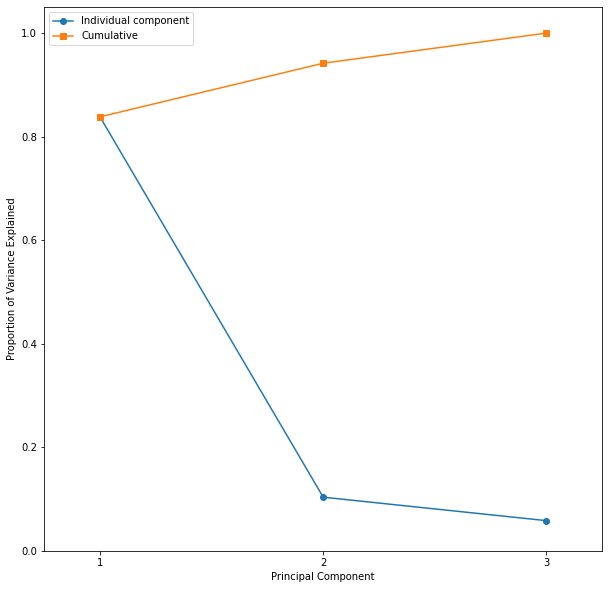

In [19]:
np.sqrt(pca.explained_variance_)

pca.explained_variance_

pca.explained_variance_ratio_

plt.figure(figsize=(10,10))

plt.plot([1,2,3], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 3.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3])
plt.legend(loc=2)

From the above plot, we can see that at 2 principal components, we are getting ~90% of the variance explained, this is good enough.

In [21]:
cluster_3pca = KMeans(n_clusters=3, random_state=42).fit(df_plot.iloc[:,0:2])

Once again, I need to swap around the groups.

In [22]:
colors4 = np.empty((620,1))
## Once again moving the cluster labels around so the color maps are similar.
for i in range(np.shape(cut)[0]):
    if cluster_3pca.labels_[i] == 1:
        colors4[i,0] = 0
        continue
    if cluster_3pca.labels_[i] == 2:
        colors4[i,0] = 1
        continue
    if cluster_3pca.labels_[i] == 0:
        colors4[i,0] = 2
        continue
    
diff2 = []
for i in range(np.shape(standard)[0]):
    if colors4[i,0] == cluster_3.labels_[i]:
        diff2.append(0)
    if colors4[i,0] != cluster_3.labels_[i]:
        diff2.append(1)

Now we can plot the 3 means PCA clustering

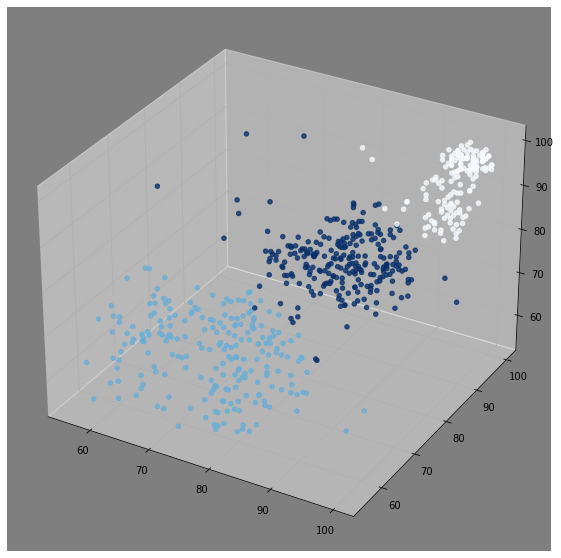

In [23]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_facecolor('tab:grey')
ax.scatter3D(student.iloc[:,0], student.iloc[:,1], student.iloc[:,2],
             c=colors4, cmap='Blues',alpha=0.8)

And we can compare the PCA clustering to the regular 3-means clustering

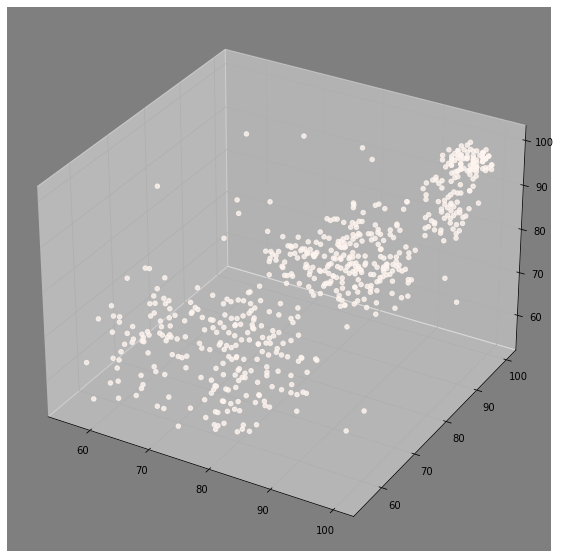

In [24]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_facecolor('tab:grey')
ax.scatter3D(student.iloc[:,0], student.iloc[:,1], student.iloc[:,2],
             c=diff2, cmap='Reds',alpha=0.8)